# Isotopes in the nuclear reaction network in MESA

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


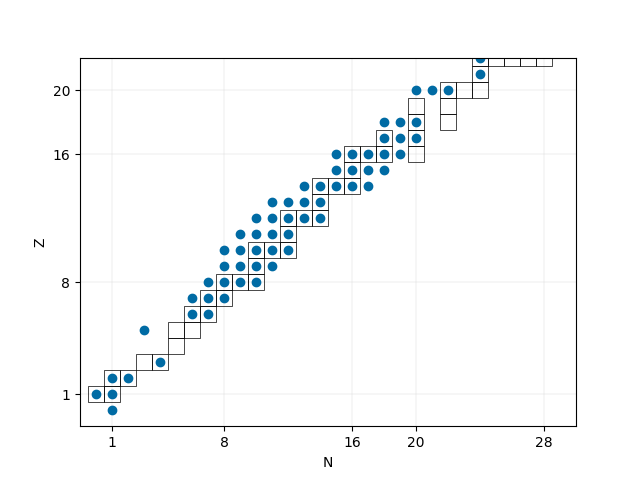

In [16]:
%pylab nbagg
import matplotlib.patches as patches
from nugridpy.utils import colourblind as cb
import numpy as np
from matplotlib.pyplot import *

# network:
ZH = [0,1,1,2,2,3,5,6,6,21,22,26]
AH = [1,1,2,3,4,7,8,12,13,45,46,56]

Z = { 'n'  : 7,
      'o'  : 8,
      'f'  : 9,
      'ne' : 10,
      'na' : 11,
      'mg' : 12,
      'al' : 13,
      'si' : 14,
      'p'  : 15,
      's'  : 16,
      'cl' : 17,
      'ar' : 18,
      'k'  : 19,
      'ca' : 20,
      'sc' : 21,
      'ti' : 22,
      'fe' : 26 }

lines=open('./network.txt','r').readlines()
for line in lines:
    zn = line.split()[0]
    a1 = int(line.split()[1])
    a2 = int(line.split()[2])
    z = Z[zn]
    for i in range(a1,a2+1):
        ZH.append(z)
        AH.append(i)
    
ZH=np.array(ZH)
AH=np.array(AH)

figure()
plot(AH-ZH,ZH,'o',color=cb(5))

# stable nuclei
lines = open( './stable.dat', 'r' ).readlines()[1:]
z = [ int( l.split()[2] ) for l in lines ]
n = [ int( l.split()[3] ) for l in lines ]

ax = gca()
ax.set_aspect('equal')
for i in range(len(z)):
    ax.add_patch(
        patches.Rectangle(
            (n[i] - 0.5, z[i] - 0.5),   # (x,y)
            1.,          # width
            1.,          # height
            facecolor = 'None',
            lw = 0.5,
            zorder = 3,
            edgecolor = 'k'
        )
    )

magic = [1,8,16,20,28,40,50,82]
for j in magic:
    axvline( j, ls = '-', lw = 0.25, c = cb(7), zorder = 1)
    axhline( j, ls = '-', lw = 0.25, c = cb(7), zorder = 1 )
xticks( magic )
yticks( magic )


xlim(-1,30)
ylim(-1,22)

xlabel('N')
ylabel('Z')